# Проект "Принятие решений в бизнесе "

Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Цель проекта - приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

## Предобработка данных 

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Подгрузим таблицы с данными:

In [2]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [4]:
#посмотрим типы данных в столбцах
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [5]:
#приведем столбцы с датой в нужный формат
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [6]:
#посмотрим количество пропусков в каждой таблице
print(orders.isna().sum())
visitors.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


date        0
group       0
visitors    0
dtype: int64

Пропуски отстутствуют. Проверим явные дубликаты.

In [7]:
print(orders.duplicated().sum())
visitors.duplicated().sum()

0


0

Явных дубликатов тоже нет, можем переходить к работе с данными.

## Приоритизация гипотез

In [8]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


В таблице 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Визуально заметно, что в таблице нет пропусков и дубликатов, поэтому можно продолжать работать с данными. 

###  Применение ICE для приоритизации гипотез

In [9]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
print(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


Наиболее перспективные гипотезы по ICE: 8, 0, 7.

### Применение RICE для приоритизации гипотез

In [10]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

print(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


Наиболее перспктивные гипотезы по RICE 7, 2, 0, 6. Появились гипотезы 2 и 7, а также поменялись приоритеты 0 и 7 гипотез. Гипотеза 7 теперь на первом месте, это произошло из-за того, что ее параметр Reach равен 10, что намного больше чем у остальных гипотез.

Изменение приоритетов гипотез произошло из-за того, что в случае применения фреймворка ICE мы не учитывали охват изменений, хотя это важная часть оценки гипотез.

Таким образом, приоритетными гипотезами для нас будут 7, 2 и 0.

## Анализ A/B-теста

После проведения A/B-теста мы получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv. Теперь необходимо выявить закономерности и сделать выводы по результатам А/В-теста.

### Построение графика кумулятивной выручки по группам

Получим таблицу с кумулятивными значениями, сгруппированными по дате и группе:

In [11]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Разделим данные по группам и для каждой группы построим график выручки:

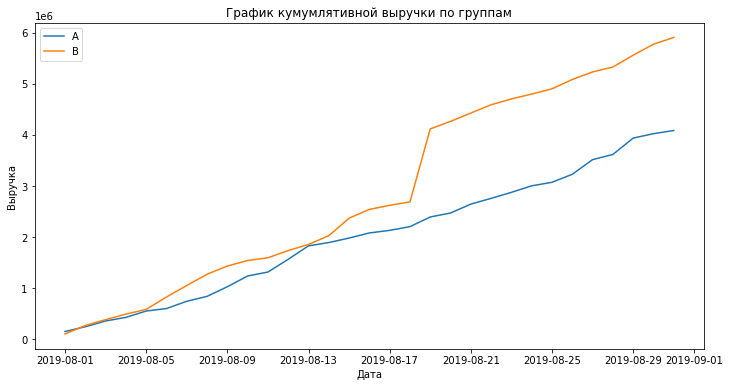

In [12]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
plt.figure(figsize=(12,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label = 'B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумумлятивной выручки по группам')
plt.show()

По графику можно сделать вывод, что показатели выручки группы В практически всегда лучше, чем у группы А. Единственное исключение - 13 августа 2019 года, там кумулятивная выручка практически одинаковая. А в целом, группа В пока показывает неплохие результаты. 

### Построение графика кумулятивного среднего чека по группам

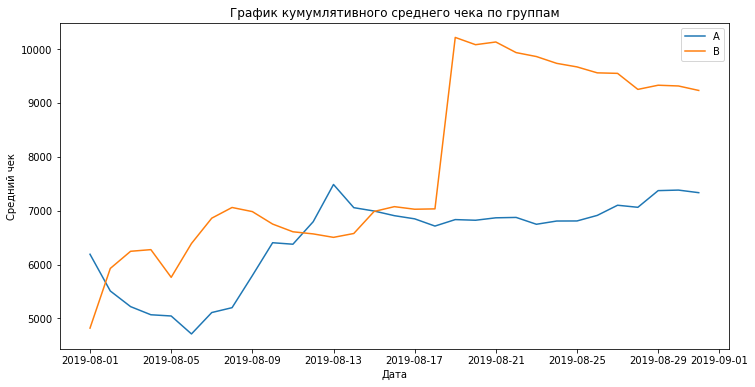

In [13]:
plt.figure(figsize=(12,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue']/cumulativeDataA['orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue']/cumulativeDataB['orders'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумумлятивного среднего чека по группам')
plt.show()

В данном случае график уже не такой очевидный, но все же кумулятивный средний чек группы В почти всегда выше, чем у группы А, за исключением 13 августа 2019 года (снова эта дата выбивается). Возможно, в этот дент что-то заставило посетителей покупать меньше. После 17 августа средний чек резко вырос, возможно этот скачок не совсем правдивый, позже изучим аномалии.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

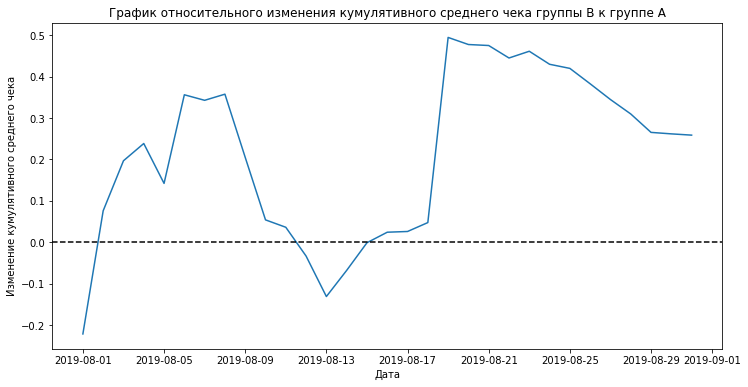

In [14]:
mergedCumulativeData = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']) 
plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeData['date'], (mergedCumulativeData['revenueB']/mergedCumulativeData['ordersB'])/(mergedCumulativeData['revenueA']/mergedCumulativeData['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Изменение кумулятивного среднего чека')
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.show()

В несколько дат результаты теста значительно менялись. Скорее всего, именно в те даты были совершены аномальные заказы.

### Построение графика кумулятивного среднего количества заказов на посетителя по группам

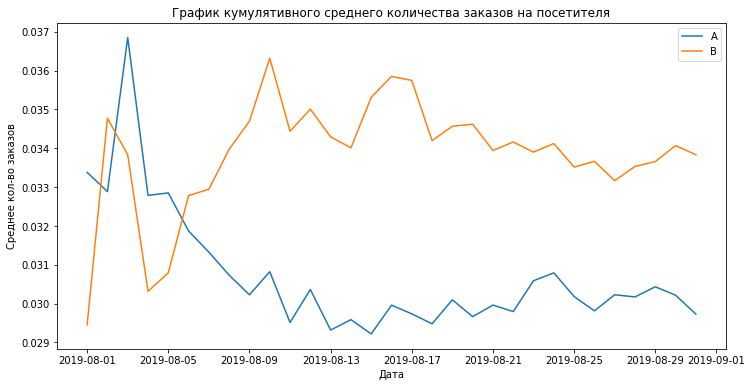

In [15]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataConvA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataConvB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(12,6))
plt.plot(cumulativeDataConvA['date'], cumulativeDataConvA['conversion'], label='A')
plt.plot(cumulativeDataConvB['date'], cumulativeDataConvB['conversion'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов')
plt.title('График кумулятивного среднего количества заказов на посетителя')
plt.show()

Сначала группа А имела большее значение среднего кол-ва заказов на посетителя, но затем после 06.08.2019 группа В сравнялась с группой А и стала заметно расти. Показатель сегмента В зафиксировался выше сегмента А, при этом колебания не очень большие- в пределах 2-3 процентов.

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

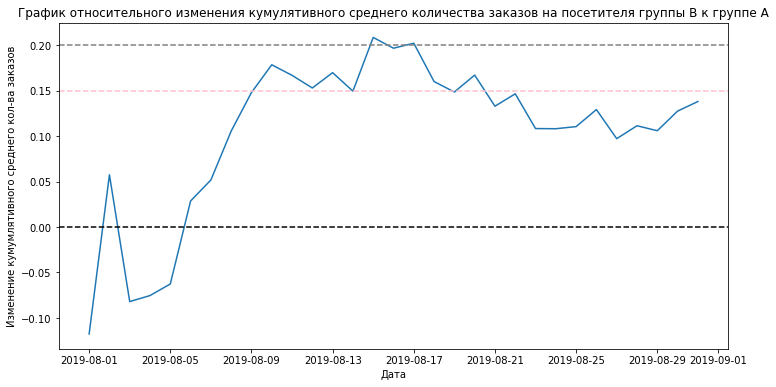

In [16]:
mergedCumulativeConversions = cumulativeDataConvA[['date','conversion']].merge(cumulativeDataConvB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xlabel('Дата')
plt.ylabel('Изменение кумумлятивного среднего кол-ва заказов')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='pink', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.show()

Почти сразу группа В лидирует по среднему количеству заказов, относительный прирост растет до 15 августа. Максимальное значение прироста около 20%, но затем он все же немного снижается, но все-таки больше 10%.

### Построение точечного графика количества заказов по пользователям

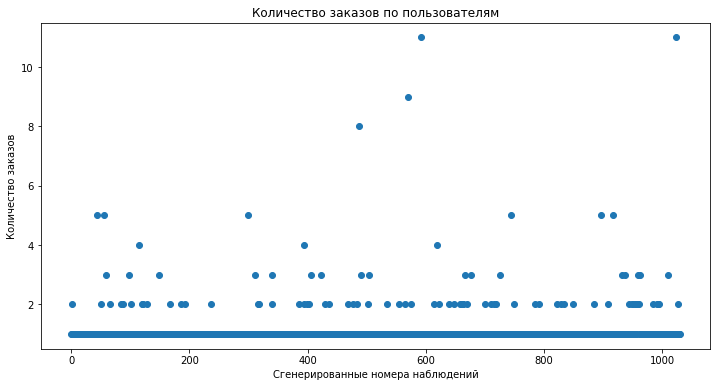

In [27]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']
plt.figure(figsize=(12,6))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Cгенерированные номера наблюдений')
plt.show()

Основная часть клиентов заказывает не более двух заказов; тех, кто заказывает больше, совсем немного. Такие заказы и могут быть аномальными. Чтобы понять 2 заказа- это много или мало- необходимо посчитать перцентили.

In [18]:
np.percentile(ordersByUsers['orders'], [95,99])

array([2., 4.])

Не больше 5 процентов пользователей совершали более 2 заказов. И не более 1 процента - больше 4 заказов. Границей для определения аномальных пользователей будет значение заказов больше двух.

### Построение точечного графика стоимостей заказов

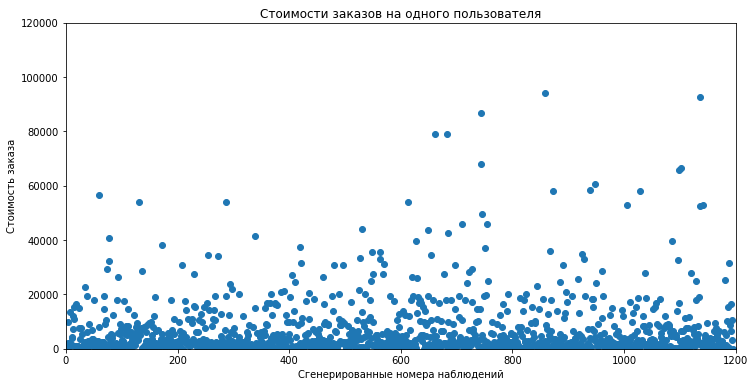

In [28]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(12,6))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимости заказов на одного пользователя')
plt.axis([0, 1200, 0, 120000])
plt.ylabel('Стоимость заказа')
plt.xlabel('Cгенерированные номера наблюдений')
plt.show()

График неоднозначный, нельзя точно оценить, где граница определения аномалий. Заказов стоимостью больше 40000 мало. Есть выбросы и около 100000. Необходимо определить перцентили: 95-й и 99-й.

In [20]:
np.percentile(orders['revenue'], [95,99])

array([28000. , 58233.2])

Не более 5% пользователей тратят больше 28000. И не больше, чем у 1% чек дороже 58233. Довольно большая разница, но определим как границу - значение 95-го перцентиля, то есть 28000.

### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем нулевую гипотезу: Статистически значимых различий в среднем числе заказов между группами нет. Альтернативная гипотеза - различие в среднем числе заказов есть. 

Уровень значимости возьмем равным 0.05.

Для проверки гипотезы будем использовать критерий Манна-Уитни. К этому методу мы прибегаем, так как работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.

In [21]:
# подготовим данные
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId':pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId':pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              20           148579              20   
1 2019-08-02              19            93822              23   
2 2019-08-03              24           112473              16   
3 2019-08-04              15            70825              16   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  20               148579   
1           165531                  39               242401   
2           114248                  63               354874   
3           108571                  78               425699   
4            92428                 103               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  20               101217               719   
1                  43               266748               619   
2                  59               38

In [22]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))


print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.01679
0.146


В среднем количестве заказов между двумя группами есть статистически значимые различия. Относительный прирост среднего группы В к значению группы А равен 14.6%. P-value равно 0.01679, что меньше уровня значимости (0.05), то есть есть основания отвергать нулевую гипотезу, различия в среднем количестве заказов статистически значимы.

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем нулевую гипотезу: различий в среднем чеке между группами нет. Альтернативная гипотеза -различия в среднем чеке между группами есть.

Уровень значимости снова возьмем равным 0.05.

Для проверки гипотезы будем также использовать критерий Манна-Уитни. К этому методу мы прибегаем, так как работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.

In [23]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value больше 0.05, значит статистически значимых отличий в среднем чеке между группами А и В нет. Относительное различие между сегментами - 25.9%. Нет оснований отвергать нулевую гипотезу, то есть различий в среднем чеке между группами нет.

### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Сформулируем нулевую гипотезу: различий в среднем количестве заказов на посетителя по "очищенным" данным между группами нет. Альтернативная гипотеза -различия в среднем количестве заказов между группами есть.

Уровень значимости снова возьмем равным 0.05.

Для проверки гипотезы будем также использовать критерий Манна-Уитни. Он используется для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно.

Ранее мы определили, что границами для определения аномалий будут следующие значеня:
- более 2 заказов;
- сумма заказа более 28000

Почистим данные, удалив аномалии:

In [24]:
# подготовим данные 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [25]:
# подсчет p-value и прироста конверсии
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01304
0.173


В среднем количестве заказов между двумя группами есть статистически значимые различия, как и по сырым данным. Относительный прирост среднего группы В к конверсии группы А равен 17.3%. P-value равно 0.01304, что меньше уровня значимости (0.05), то есть есть основания отвергать нулевую гипотезу, различия в конверсии снова статистически значимы. Сегмент В значительно лучше сегмента А.

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем нулевую гипотезу: различий в среднем чеке заказа по "очищенным" данным между группами нет. Альтернативная гипотеза -различия в среднем чеке заказа между группами есть.

Уровень значимости снова возьмем равным 0.05.

Для проверки гипотезы будем также использовать критерий Манна-Уитни. Он используется для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно.

In [26]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


Относительное различие между сегментами близко к нулю (-2%). P-value значительно больше 0.05, то есть нет оснований отвергнуть нулевую гипотезу, значит статистически значимых отличий в среднем чеке между группами А и В нет.

### Принятие решения

Промежуточные выводы по анализу А/В-теста:
1. Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
2. Статистически значимых отличий по среднему чеку как по сырым данным, так и после удаления аномалий нет. 
3. График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения (0.1).
4. График различия среднего чека колеблется: он-то и позволил нам найти аномалии. Сделать из этого графика определённые выводы нельзя.

Таким образом, тест можно считать успешным. Рекомендую остановить тест, признать его успешным и перейти к проверке следующей гипотезы. Признаем победу группы В. 